In [1]:
# Import required libraries
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd().parent))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score, roc_auc_score, 
    average_precision_score, accuracy_score, roc_curve, precision_recall_curve
)


# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, 
    average_precision_score, confusion_matrix, classification_report
)

In [3]:
RANDOM_STATE = 44
CLASS_WEIGHT = 'balanced'

In [4]:
# Ensure the notebook runs from project root so relative paths like 'data/creditcard.csv' work
import os
from pathlib import Path
print("Working directory before change:", os.getcwd())
project_root = Path(r'\Users\nolan\OneDrive\Desktop\School\CS\Credit-Card-Fraud-Detection')
if project_root.exists():
    os.chdir(project_root)
    print("Changed working directory to:", os.getcwd())
else:
    raise FileNotFoundError(f"Project root not found: {project_root}")
# Show top-level contents to confirm working directory
print('Top-level files/folders:', os.listdir('.'))

Working directory before change: c:\Users\nolan\OneDrive\Desktop\School\CS\Credit-Card-Fraud-Detection\notebooks
Changed working directory to: c:\Users\nolan\OneDrive\Desktop\School\CS\Credit-Card-Fraud-Detection
Top-level files/folders: ['.git', 'data', 'notebooks', 'requirements.txt']


In [5]:
smote_x_train = pd.read_csv('data/preprocessed/x_train_smote.csv')
smote_y_train = pd.read_csv('data/preprocessed/y_train_smote.csv').values.ravel()

x_train = pd.read_csv('data/preprocessed/x_train.csv')
y_train = pd.read_csv('data/preprocessed/y_train.csv').values.ravel()

x_test = pd.read_csv('data/preprocessed/x_test.csv')
y_test = pd.read_csv('data/preprocessed/y_test.csv').values.ravel()

# Logistic Regression using both smote and raw dataset

In [6]:
lr = LogisticRegression(
        class_weight=CLASS_WEIGHT,
        random_state=RANDOM_STATE,
        max_iter=10000,
        solver='lbfgs',
        n_jobs=-1)

lr_smote = LogisticRegression(
        # class_weight=CLASS_WEIGHT,
        random_state=RANDOM_STATE,
        max_iter=10000,
        solver='lbfgs',
        n_jobs=-1)

In [7]:
def compute_metrics(y_true, y_pred, y_pred_proba=None):
    """
    Compute multiple evaluation metrics.
    
    Args:
        y_true: True labels
        y_pred: Predicted labels
        y_pred_proba: Predicted probabilities (for AUC scores)
        
    Returns:
        dict: Dictionary of metrics
    """
    metrics = {
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0),
        'confusion_matrix': confusion_matrix(y_true, y_pred)
    }
    
    if y_pred_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba)
        metrics['pr_auc'] = average_precision_score(y_true, y_pred_proba)
    
    return metrics


In [8]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
metrics = compute_metrics(y_test, y_pred, lr.predict_proba(x_test)[:, 1])
for metric, value in metrics.items():
    print(f"{metric}: {value}")

precision: 0.06692307692307692
recall: 0.8877551020408163
f1: 0.12446351931330472
confusion_matrix: [[55651  1213]
 [   11    87]]
roc_auc: 0.9703650241751174
pr_auc: 0.7622497444796692


In [9]:
print(metrics['confusion_matrix'])

[[55651  1213]
 [   11    87]]


In [10]:
lr_smote.fit(smote_x_train, smote_y_train)
y_pred = lr_smote.predict(x_test)
metrics = compute_metrics(y_test, y_pred, lr_smote.predict_proba(x_test)[:, 1])
for metric, value in metrics.items():
    print(f"{metric}: {value}")

precision: 0.15711645101663585
recall: 0.8673469387755102
f1: 0.26604068857589985
confusion_matrix: [[56408   456]
 [   13    85]]
roc_auc: 0.9741191478701778
pr_auc: 0.7529604500377118


# Random Forest using both smote and raw dataset

In [ ]:
rf = RandomForestClassifier(
        class_weight=CLASS_WEIGHT,
        random_state=RANDOM_STATE,
        n_estimators=100 ,
        n_jobs=-1)

rf_smote = RandomForestClassifier(
        # class_weight=CLASS_WEIGHT,
        random_state=RANDOM_STATE,
        n_estimators=100,
        n_jobs=-1)

In [12]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
metrics = compute_metrics(y_test, y_pred, rf.predict_proba(x_test)[:, 1])
for metric, value in metrics.items():
    print(f"{metric}: {value}")

precision: 0.9397590361445783
recall: 0.7959183673469388
f1: 0.861878453038674
confusion_matrix: [[56859     5]
 [   20    78]]
roc_auc: 0.9475316329401766
pr_auc: 0.8421266970125862


In [13]:
print(metrics['confusion_matrix'])

[[56859     5]
 [   20    78]]


In [14]:
rf_smote.fit(smote_x_train, smote_y_train)
y_pred = rf_smote.predict(x_test)
metrics = compute_metrics(y_test, y_pred, rf_smote.predict_proba(x_test)[:, 1])
for metric, value in metrics.items():
    print(f"{metric}: {value}")

precision: 0.8709677419354839
recall: 0.826530612244898
f1: 0.8481675392670157
confusion_matrix: [[56852    12]
 [   17    81]]
roc_auc: 0.9627503646365695
pr_auc: 0.8335146830460164


# XGBoost using both smote and raw dataset

In [15]:
xgb = XGBClassifier(
        random_state=RANDOM_STATE,
        n_estimators=1000,
        eval_metric='logloss',
        device='cpu')

xgb_smote = XGBClassifier(
        random_state=RANDOM_STATE,
        n_estimators=1000,
        eval_metric='logloss',
        device='cpu')

In [16]:
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
metrics = compute_metrics(y_test, y_pred, xgb.predict_proba(x_test)[:, 1])
for metric, value in metrics.items():
    print(f"{metric}: {value}")

precision: 0.9036144578313253
recall: 0.7653061224489796
f1: 0.8287292817679558
confusion_matrix: [[56856     8]
 [   23    75]]
roc_auc: 0.9794637114834679
pr_auc: 0.8050759890701278


In [17]:
print(metrics['confusion_matrix'])

[[56856     8]
 [   23    75]]


In [18]:
xgb_smote.fit(smote_x_train, smote_y_train)
y_pred = xgb_smote.predict(x_test)
metrics = compute_metrics(y_test, y_pred, xgb_smote.predict_proba(x_test)[:, 1])
for metric, value in metrics.items():
    print(f"{metric}: {value}")

precision: 0.8709677419354839
recall: 0.826530612244898
f1: 0.8481675392670157
confusion_matrix: [[56852    12]
 [   17    81]]
roc_auc: 0.9760474867352681
pr_auc: 0.8602247650130495


# LightGBM using both smote and raw dataset

In [19]:
lgbm = LGBMClassifier(
        class_weight=CLASS_WEIGHT,
        random_state=RANDOM_STATE,
        n_estimators=1000,
        verbose=-1,
        device='gpu')

lgbm_smote = LGBMClassifier(
        # class_weight=CLASS_WEIGHT,
        random_state=RANDOM_STATE,
        learning_rate=0.1,
        max_depth=6,
        n_estimators=1000,
        verbose=-1,
        device='gpu')

In [20]:
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_test)
metrics = compute_metrics(y_test, y_pred, lgbm.predict_proba(x_test)[:, 1])
for metric, value in metrics.items():
    print(f"{metric}: {value}")

precision: 0.9080459770114943
recall: 0.8061224489795918
f1: 0.8540540540540541
confusion_matrix: [[56856     8]
 [   19    79]]
roc_auc: 0.9651533411620135
pr_auc: 0.8385508077901803


In [21]:
print(metrics['confusion_matrix'])

[[56856     8]
 [   19    79]]


In [22]:
lgbm_smote.fit(smote_x_train, smote_y_train)
y_pred = lgbm_smote.predict(x_test)
metrics = compute_metrics(y_test, y_pred, lgbm_smote.predict_proba(x_test)[:, 1])
for metric, value in metrics.items():
    print(f"{metric}: {value}")

precision: 0.898876404494382
recall: 0.8163265306122449
f1: 0.8556149732620321
confusion_matrix: [[56855     9]
 [   18    80]]
roc_auc: 0.9827090128398012
pr_auc: 0.8600786284404393


In [23]:
# Collect metrics for all models
models_raw = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb,
    'LightGBM': lgbm
}

models_smote = {
    'Logistic Regression': lr_smote,
    'Random Forest': rf_smote,
    'XGBoost': xgb_smote,
    'LightGBM': lgbm_smote
}

# Store results
results_raw = {}
results_smote = {}

# Evaluate raw dataset models
for name, model in models_raw.items():
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    results_raw[name] = compute_metrics(y_test, y_pred, y_pred_proba)

# Evaluate SMOTE dataset models
for name, model in models_smote.items():
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    results_smote[name] = compute_metrics(y_test, y_pred, y_pred_proba)

print("Metrics collected for all models")

Metrics collected for all models


# Model Comparison Visualizations

In [24]:
# Create comparison dataframes
import pandas as pd

# Extract metrics for comparison
metrics_comparison = []

for name in models_raw.keys():
    metrics_comparison.append({
        'Model': name,
        'Dataset': 'Raw',
        'Precision': results_raw[name]['precision'],
        'Recall': results_raw[name]['recall'],
        'F1': results_raw[name]['f1'],
        'ROC-AUC': results_raw[name]['roc_auc'],
        'PR-AUC': results_raw[name]['pr_auc']
    })
    
    metrics_comparison.append({
        'Model': name,
        'Dataset': 'SMOTE',
        'Precision': results_smote[name]['precision'],
        'Recall': results_smote[name]['recall'],
        'F1': results_smote[name]['f1'],
        'ROC-AUC': results_smote[name]['roc_auc'],
        'PR-AUC': results_smote[name]['pr_auc']
    })

df_comparison = pd.DataFrame(metrics_comparison)
print(df_comparison.to_string(index=False))

              Model Dataset  Precision   Recall       F1  ROC-AUC   PR-AUC
Logistic Regression     Raw   0.066923 0.887755 0.124464 0.970365 0.762250
Logistic Regression   SMOTE   0.157116 0.867347 0.266041 0.974119 0.752960
      Random Forest     Raw   0.939759 0.795918 0.861878 0.947532 0.842127
      Random Forest   SMOTE   0.870968 0.826531 0.848168 0.962750 0.833515
            XGBoost     Raw   0.903614 0.765306 0.828729 0.979464 0.805076
            XGBoost   SMOTE   0.870968 0.826531 0.848168 0.976047 0.860225
           LightGBM     Raw   0.908046 0.806122 0.854054 0.965153 0.838551
           LightGBM   SMOTE   0.898876 0.816327 0.855615 0.982709 0.860079


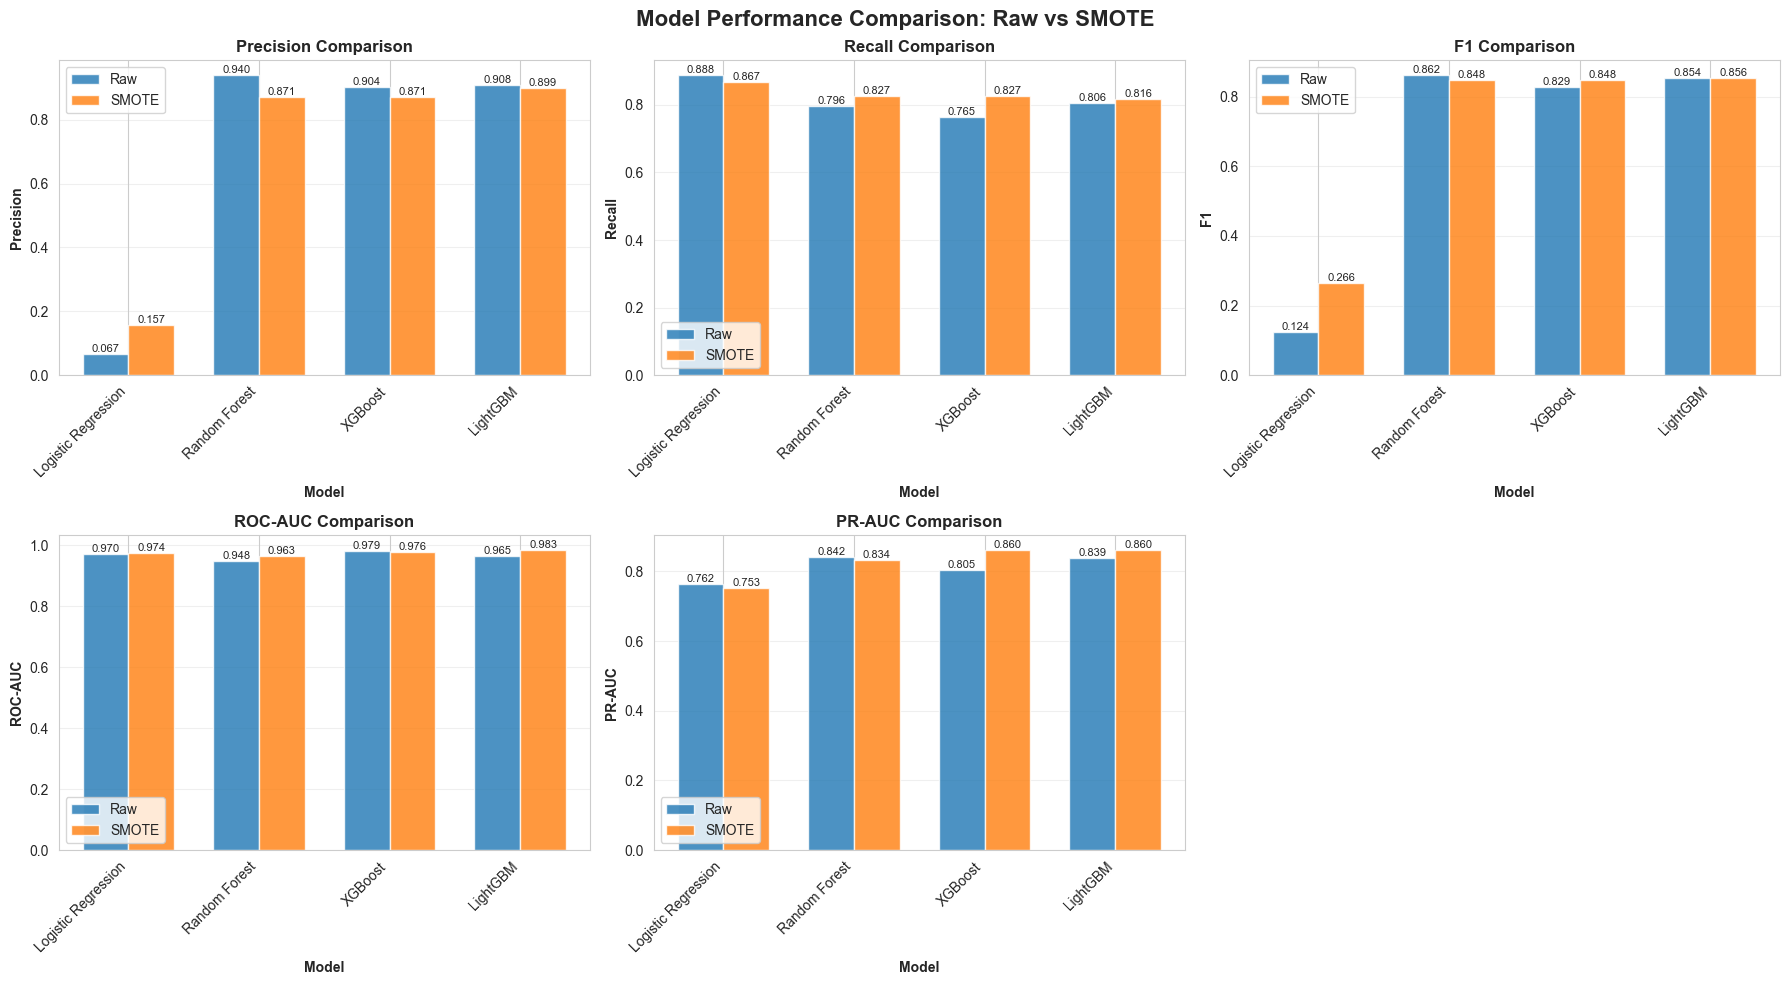

In [25]:
# Visualization 1: Performance Metrics Comparison (Bar Charts)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison: Raw vs SMOTE', fontsize=16, fontweight='bold')

metrics_to_plot = ['Precision', 'Recall', 'F1', 'ROC-AUC', 'PR-AUC']

for idx, metric in enumerate(metrics_to_plot):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Prepare data for grouped bar chart
    raw_values = [results_raw[name][metric.lower().replace('-', '_')] for name in models_raw.keys()]
    smote_values = [results_smote[name][metric.lower().replace('-', '_')] for name in models_smote.keys()]
    
    x = np.arange(len(models_raw))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, raw_values, width, label='Raw', alpha=0.8)
    bars2 = ax.bar(x + width/2, smote_values, width, label='SMOTE', alpha=0.8)
    
    ax.set_xlabel('Model', fontweight='bold')
    ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(list(models_raw.keys()), rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Remove extra subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

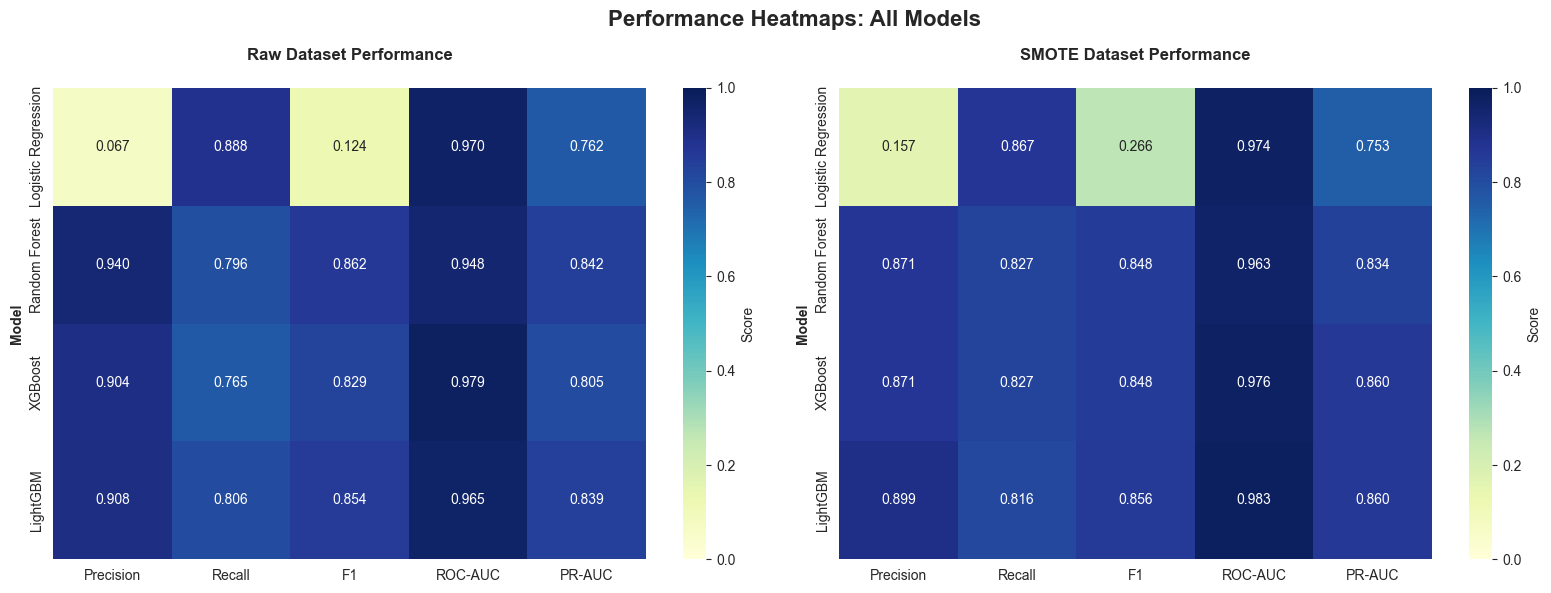

In [26]:
# Visualization 2: Heatmap of Model Performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Performance Heatmaps: All Models', fontsize=16, fontweight='bold')

# Raw dataset heatmap
raw_data = []
for name in models_raw.keys():
    raw_data.append([
        results_raw[name]['precision'],
        results_raw[name]['recall'],
        results_raw[name]['f1'],
        results_raw[name]['roc_auc'],
        results_raw[name]['pr_auc']
    ])

raw_df = pd.DataFrame(raw_data, 
                      index=list(models_raw.keys()),
                      columns=['Precision', 'Recall', 'F1', 'ROC-AUC', 'PR-AUC'])

sns.heatmap(raw_df, annot=True, fmt='.3f', cmap='YlGnBu', ax=ax1, 
            cbar_kws={'label': 'Score'}, vmin=0, vmax=1)
ax1.set_title('Raw Dataset Performance', fontweight='bold', pad=20)
ax1.set_ylabel('Model', fontweight='bold')

# SMOTE dataset heatmap
smote_data = []
for name in models_smote.keys():
    smote_data.append([
        results_smote[name]['precision'],
        results_smote[name]['recall'],
        results_smote[name]['f1'],
        results_smote[name]['roc_auc'],
        results_smote[name]['pr_auc']
    ])

smote_df = pd.DataFrame(smote_data, 
                        index=list(models_smote.keys()),
                        columns=['Precision', 'Recall', 'F1', 'ROC-AUC', 'PR-AUC'])

sns.heatmap(smote_df, annot=True, fmt='.3f', cmap='YlGnBu', ax=ax2,
            cbar_kws={'label': 'Score'}, vmin=0, vmax=1)
ax2.set_title('SMOTE Dataset Performance', fontweight='bold', pad=20)
ax2.set_ylabel('Model', fontweight='bold')

plt.tight_layout()
plt.show()

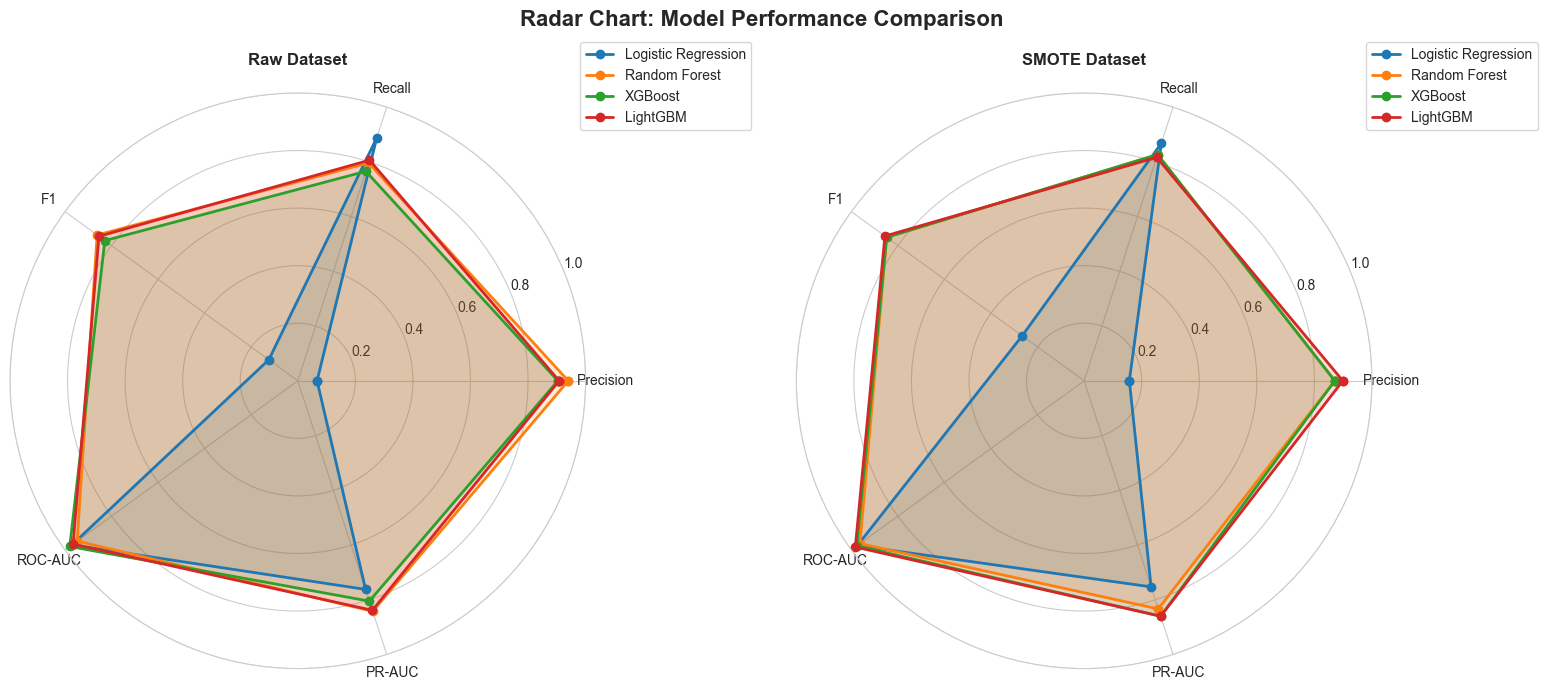

In [27]:
# Visualization 3: Radar Charts for Model Comparison
from math import pi

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), subplot_kw=dict(projection='polar'))
fig.suptitle('Radar Chart: Model Performance Comparison', fontsize=16, fontweight='bold')

categories = ['Precision', 'Recall', 'F1', 'ROC-AUC', 'PR-AUC']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Raw dataset radar
ax1.set_title('Raw Dataset', fontweight='bold', pad=20)
for name in models_raw.keys():
    values = [
        results_raw[name]['precision'],
        results_raw[name]['recall'],
        results_raw[name]['f1'],
        results_raw[name]['roc_auc'],
        results_raw[name]['pr_auc']
    ]
    values += values[:1]
    ax1.plot(angles, values, 'o-', linewidth=2, label=name)
    ax1.fill(angles, values, alpha=0.15)

ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(categories)
ax1.set_ylim(0, 1)
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax1.grid(True)

# SMOTE dataset radar
ax2.set_title('SMOTE Dataset', fontweight='bold', pad=20)
for name in models_smote.keys():
    values = [
        results_smote[name]['precision'],
        results_smote[name]['recall'],
        results_smote[name]['f1'],
        results_smote[name]['roc_auc'],
        results_smote[name]['pr_auc']
    ]
    values += values[:1]
    ax2.plot(angles, values, 'o-', linewidth=2, label=name)
    ax2.fill(angles, values, alpha=0.15)

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories)
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax2.grid(True)

plt.tight_layout()
plt.show()

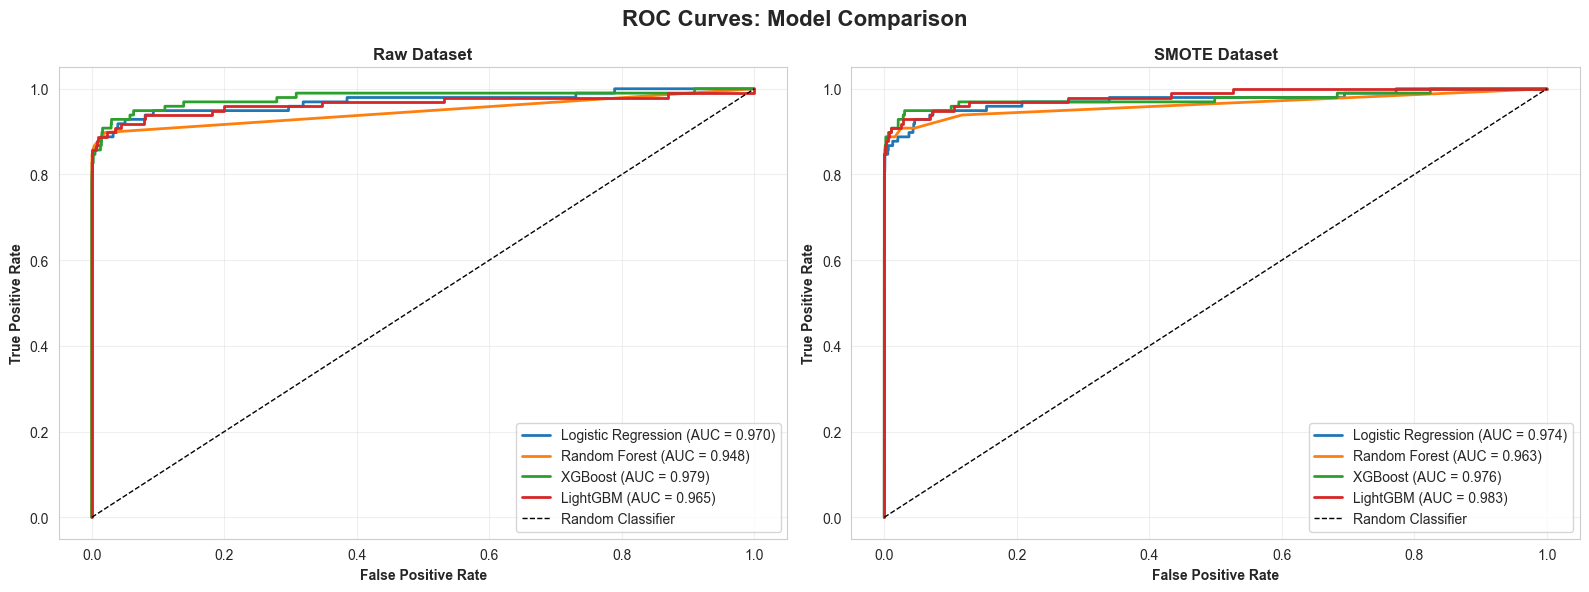

In [28]:
# Visualization 4: ROC Curves Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('ROC Curves: Model Comparison', fontsize=16, fontweight='bold')

# Raw dataset ROC curves
ax1.set_title('Raw Dataset', fontweight='bold')
for name, model in models_raw.items():
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = results_raw[name]['roc_auc']
    ax1.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc_score:.3f})')

ax1.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
ax1.set_xlabel('False Positive Rate', fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(alpha=0.3)

# SMOTE dataset ROC curves
ax2.set_title('SMOTE Dataset', fontweight='bold')
for name, model in models_smote.items():
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = results_smote[name]['roc_auc']
    ax2.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc_score:.3f})')

ax2.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc='lower right')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

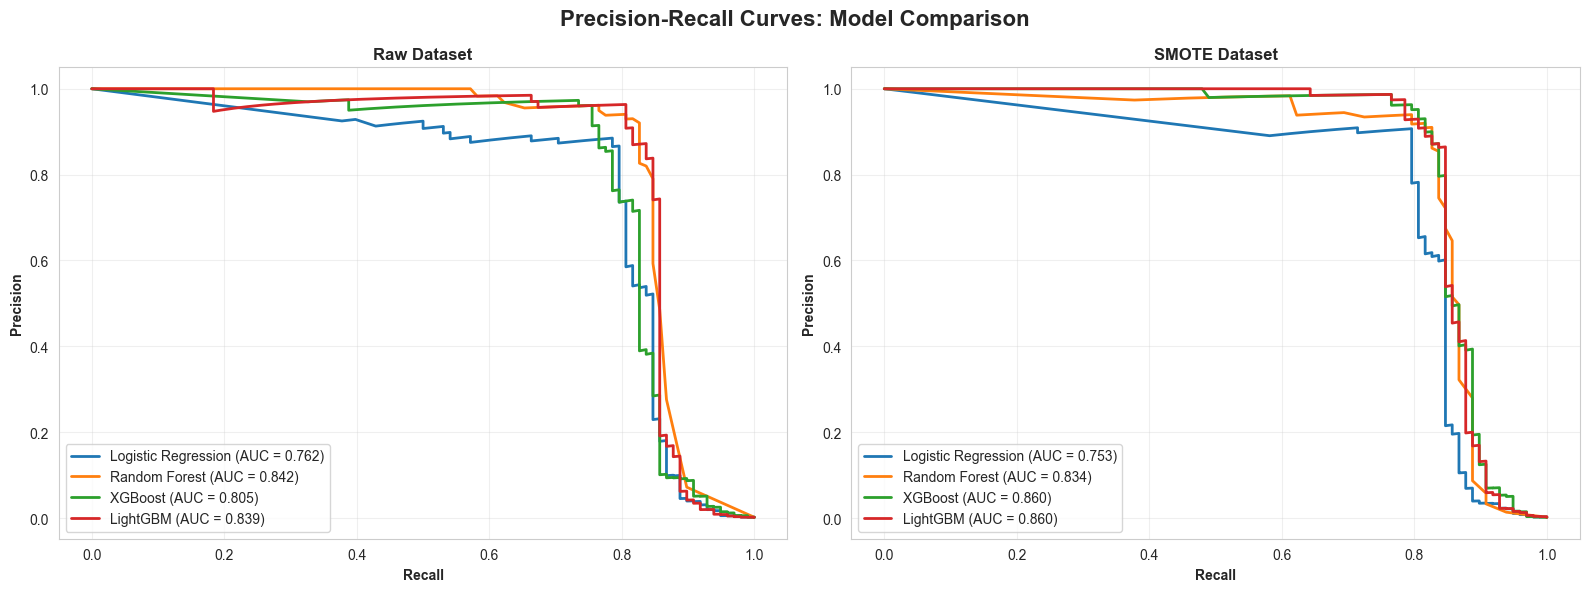

In [29]:
# Visualization 5: Precision-Recall Curves Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Precision-Recall Curves: Model Comparison', fontsize=16, fontweight='bold')

# Raw dataset PR curves
ax1.set_title('Raw Dataset', fontweight='bold')
for name, model in models_raw.items():
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = results_raw[name]['pr_auc']
    ax1.plot(recall, precision, linewidth=2, label=f'{name} (AUC = {pr_auc:.3f})')

ax1.set_xlabel('Recall', fontweight='bold')
ax1.set_ylabel('Precision', fontweight='bold')
ax1.legend(loc='best')
ax1.grid(alpha=0.3)

# SMOTE dataset PR curves
ax2.set_title('SMOTE Dataset', fontweight='bold')
for name, model in models_smote.items():
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = results_smote[name]['pr_auc']
    ax2.plot(recall, precision, linewidth=2, label=f'{name} (AUC = {pr_auc:.3f})')

ax2.set_xlabel('Recall', fontweight='bold')
ax2.set_ylabel('Precision', fontweight='bold')
ax2.legend(loc='best')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

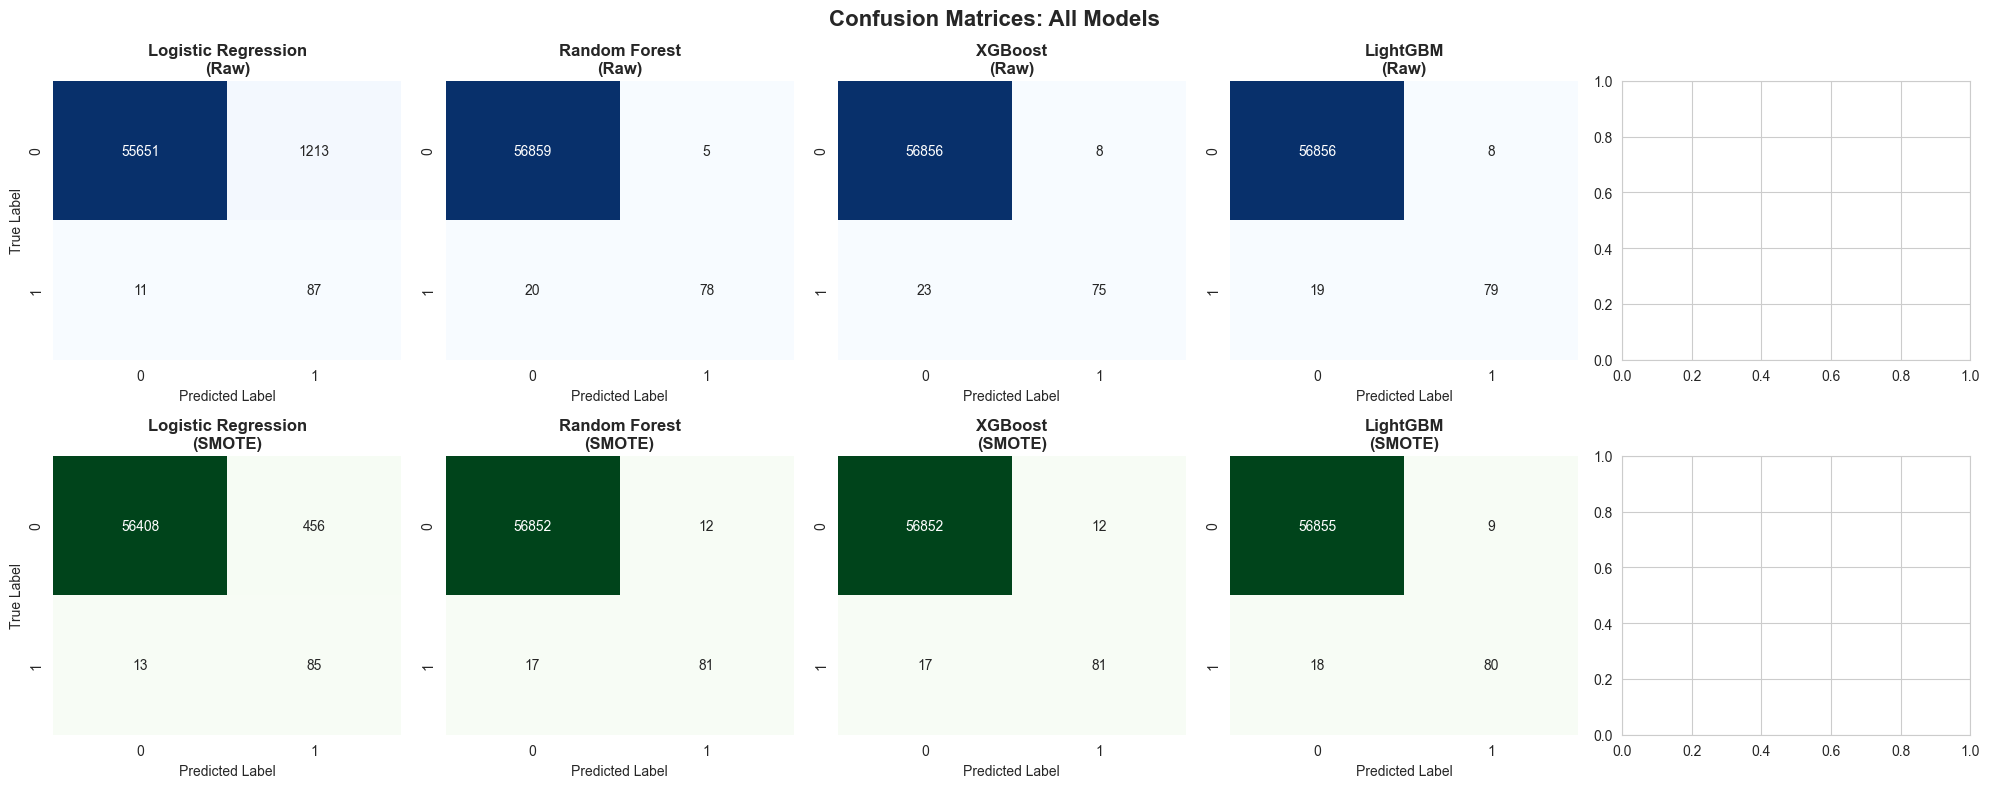

In [30]:
# Visualization 6: Confusion Matrices Comparison
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Confusion Matrices: All Models', fontsize=16, fontweight='bold')

# Raw dataset confusion matrices
for idx, (name, model) in enumerate(models_raw.items()):
    ax = axes[0, idx]
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'{name}\n(Raw)', fontweight='bold')
    ax.set_ylabel('True Label' if idx == 0 else '')
    ax.set_xlabel('Predicted Label')

# SMOTE dataset confusion matrices
for idx, (name, model) in enumerate(models_smote.items()):
    ax = axes[1, idx]
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax, cbar=False)
    ax.set_title(f'{name}\n(SMOTE)', fontweight='bold')
    ax.set_ylabel('True Label' if idx == 0 else '')
    ax.set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

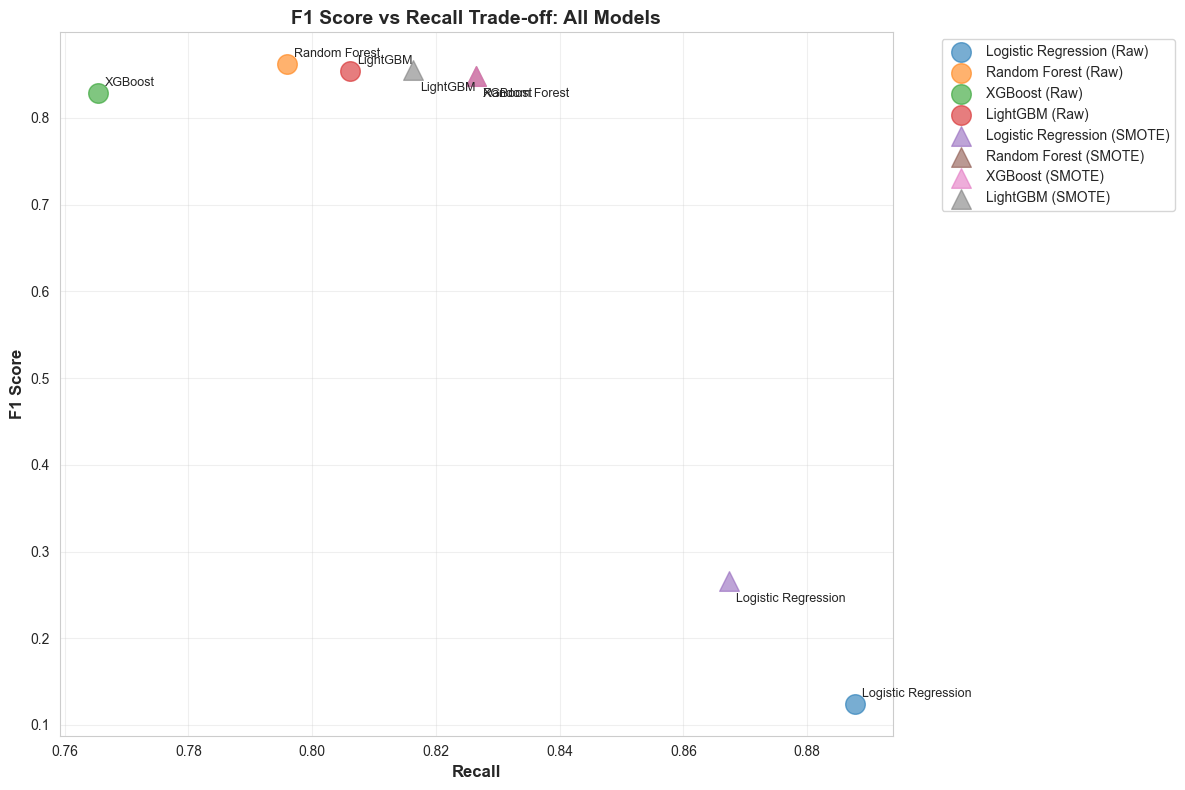

In [31]:
# Visualization 7: F1 Score vs Recall Trade-off
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for raw dataset
for name in models_raw.keys():
    recall = results_raw[name]['recall']
    f1 = results_raw[name]['f1']
    ax.scatter(recall, f1, s=200, alpha=0.6, label=f'{name} (Raw)', marker='o')
    ax.annotate(name, (recall, f1), xytext=(5, 5), textcoords='offset points', fontsize=9)

# Plot for SMOTE dataset
for name in models_smote.keys():
    recall = results_smote[name]['recall']
    f1 = results_smote[name]['f1']
    ax.scatter(recall, f1, s=200, alpha=0.6, label=f'{name} (SMOTE)', marker='^')
    ax.annotate(name, (recall, f1), xytext=(5, -15), textcoords='offset points', fontsize=9)

ax.set_xlabel('Recall', fontweight='bold', fontsize=12)
ax.set_ylabel('F1 Score', fontweight='bold', fontsize=12)
ax.set_title('F1 Score vs Recall Trade-off: All Models', fontweight='bold', fontsize=14)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

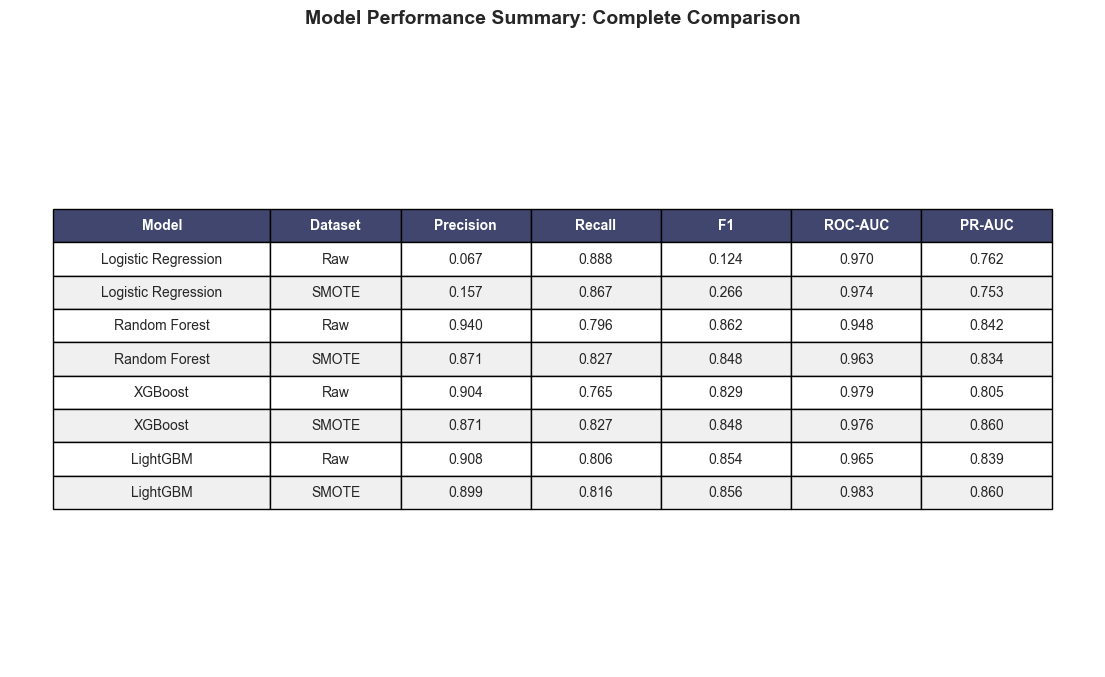

In [32]:
# Visualization 8: Summary Statistics Table
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('tight')
ax.axis('off')

# Create summary table
table_data = []
for name in models_raw.keys():
    table_data.append([
        name,
        'Raw',
        f"{results_raw[name]['precision']:.3f}",
        f"{results_raw[name]['recall']:.3f}",
        f"{results_raw[name]['f1']:.3f}",
        f"{results_raw[name]['roc_auc']:.3f}",
        f"{results_raw[name]['pr_auc']:.3f}"
    ])
    table_data.append([
        name,
        'SMOTE',
        f"{results_smote[name]['precision']:.3f}",
        f"{results_smote[name]['recall']:.3f}",
        f"{results_smote[name]['f1']:.3f}",
        f"{results_smote[name]['roc_auc']:.3f}",
        f"{results_smote[name]['pr_auc']:.3f}"
    ])

columns = ['Model', 'Dataset', 'Precision', 'Recall', 'F1', 'ROC-AUC', 'PR-AUC']
table = ax.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center',
                colWidths=[0.2, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header
for i in range(len(columns)):
    table[(0, i)].set_facecolor('#40466e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(table_data) + 1):
    for j in range(len(columns)):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')
        else:
            table[(i, j)].set_facecolor('white')

plt.title('Model Performance Summary: Complete Comparison', 
          fontweight='bold', fontsize=14, pad=20)
plt.show()